# Investment Analysis Assignment

In [135]:
## import necessary libraries
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [136]:
## importing datasets
companies = pd.read_csv("datasets/companies.csv", encoding = "ISO-8859-1")
rounds = pd.read_csv("datasets/rounds2.csv", encoding = "ISO-8859-1")

### Checkpoint 1: Data Cleaning 1

In [137]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [138]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [139]:
##getting the unique companies based on name
print(len(companies.name.unique()))

66100


In [140]:
##getting the unique companies based on permalink column
print(len(companies.permalink.unique()))

66368


In [141]:
##getting the unique companies based on company_permalink column from rounds dataset
print(len(rounds.company_permalink.unique()))

90247


In [142]:
##company_permalink is case sensitive and changing the case to lower
print(len(rounds.company_permalink.str.lower().unique()))

66370


In [143]:
companies['permalink'] = companies['permalink'].str.lower()

In [144]:
rounds['permalink'] = rounds['company_permalink'].str.lower()

In [145]:
print(len(rounds.permalink.unique()))

66370


In [146]:
rounds_left_join = pd.merge(rounds, companies, how='left', on='permalink', indicator=True)
rem = rounds_left_join[rounds_left_join['_merge'] != 'both']
len(rem)

7

In [147]:
len(rounds)

114949

In [148]:
##initiating merge to main_frame
master_frame = pd.merge(rounds, companies , how='inner', on='permalink')
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [149]:
master_frame.shape

(114942, 16)

In [150]:
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83803
funded_at                      0
raised_amount_usd          19984
permalink                      0
name                           1
homepage_url                6132
category_list               3407
status                         0
country_code                8671
state_code                 10939
region                     10160
city                       10157
founded_at                 20520
dtype: int64

In [151]:
# removing non-contributing and duplicate columns
master_frame = master_frame.drop('funding_round_code', axis=1)
master_frame = master_frame.drop('founded_at', axis=1)
master_frame = master_frame.drop('company_permalink', axis=1)

In [152]:
master_frame.isnull().sum()

funding_round_permalink        0
funding_round_type             0
funded_at                      0
raised_amount_usd          19984
permalink                      0
name                           1
homepage_url                6132
category_list               3407
status                         0
country_code                8671
state_code                 10939
region                     10160
city                       10157
dtype: int64

In [153]:
master_frame = master_frame[master_frame.status !='closed']

In [154]:
master_frame = master_frame[pd.notnull(master_frame.raised_amount_usd)]

In [155]:
##checking missing percentage
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

funding_round_permalink   0.00
funding_round_type        0.00
funded_at                 0.00
raised_amount_usd         0.00
permalink                 0.00
name                      0.00
homepage_url              4.31
category_list             0.72
status                    0.00
country_code              5.26
state_code                7.10
region                    6.50
city                      6.50
dtype: float64

In [156]:
##calculating the missing percentage (0.08 seems the data is good enough)
100*(len(master_frame[master_frame.isnull().sum(axis=1) > 5].index) / len(master_frame.index))

0.08645893769268398

In [157]:
## we can also drop non-useful data
master_frame = master_frame.drop('homepage_url', axis=1)
master_frame = master_frame.drop('state_code', axis=1)
master_frame = master_frame.drop('region', axis=1)
master_frame = master_frame.drop('city', axis=1)

In [158]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

funding_round_permalink   0.00
funding_round_type        0.00
funded_at                 0.00
raised_amount_usd         0.00
permalink                 0.00
name                      0.00
category_list             0.72
status                    0.00
country_code              5.26
dtype: float64

In [159]:
## now the data is almost perfect
100*(len(master_frame[master_frame.isnull().sum(axis=1) > 5].index) / len(master_frame.index))

0.0

In [160]:
## category_list and country_code have few null entries
## trying to impute them

master_frame.loc[pd.isnull(master_frame['country_code']), ['country_code']] = 'NOTAV'
master_frame.loc[pd.isnull(master_frame['category_list']), ['category_list']] = "UNDEF"

In [161]:
## now the data is perfect
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

funding_round_permalink   0.00
funding_round_type        0.00
funded_at                 0.00
raised_amount_usd         0.00
permalink                 0.00
name                      0.00
category_list             0.00
status                    0.00
country_code              0.00
dtype: float64

#### Observations:
    
1. How many unique companies are present in rounds2? - **66370**
2. How many unique companies are present in companies? - **66368**
3. In the companies data frame, which column can be used as the unique key for each company? Write the name of the column. - **Permalink**
4. Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N - **Y**
5. Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame? - **114942**

<br>

### Checkpoint 2: Funding Type Analysis

In [162]:
pd.options.display.float_format = '{:.2f}'.format
master_frame.groupby(by='funding_round_type')['raised_amount_usd'].mean().sort_values(ascending = False)

funding_round_type
post_ipo_debt           174609327.83
secondary_market         91439812.08
post_ipo_equity          84233860.84
private_equity           75575807.53
undisclosed              18837083.67
debt_financing           17774074.30
venture                  11895603.42
grant                     4154313.76
convertible_note          1479851.33
product_crowdfunding      1411511.15
angel                      979915.36
seed                       738590.22
equity_crowdfunding        519844.07
non_equity_assistance      402815.97
Name: raised_amount_usd, dtype: float64

In [163]:
## Creating a new DataFrame for the desired Funding type

funding_types=pd.DataFrame(master_frame.loc[(master_frame['funding_round_type'] == 'angel') | 
                                                  (master_frame['funding_round_type'] == 'venture') | 
                                                  (master_frame['funding_round_type'] == 'seed') | 
                                                  (master_frame['funding_round_type'] == 'private_equity'), :].
                                groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending = False))
funding_types.reset_index(inplace=True)
funding_types.head()

,funding_round_type,raised_amount_usd
0,private_equity,75575807.53
1,venture,11895603.42
2,angel,979915.36
3,seed,738590.22


In [164]:
## For the criterion of 5 to 15 million usd

funding_types.loc[(funding_types['raised_amount_usd'] > 5000000.00) &
                        (funding_types['raised_amount_usd'] < 15000000.00)]

,funding_round_type,raised_amount_usd
1,venture,11895603.42


#### Observations:
    
   - Considering that Spark Funds wants to invest between 5 to 15 million USD per investment round, which investment type is the most suitable for them? - **Venture**

<br>

### Checkpoint 3: Country Analysis

In [165]:
## creating a new dataframe for venture

venture = master_frame.loc[master_frame['funding_round_type'] == 'venture', :]
venture.shape

(46641, 9)

In [166]:
t9 = pd.DataFrame(venture.groupby(by='country_code')['raised_amount_usd'].sum().sort_values(ascending = False).head(n=9))
t9.reset_index(inplace=True) ## THIS IS REQUIRED FOR EASY PLOTTING OF BAR CHART FOR TOP 9 COUNTRIES
t9

,country_code,raised_amount_usd
0,USA,399935149987.00
1,CHN,39101773502.00
2,NOTAV,19788033376.00
3,GBR,18241343570.00
4,IND,14050603718.00
5,CAN,8825487216.00
6,FRA,6775044017.00
7,ISR,6503020916.00
8,DEU,6061140919.00


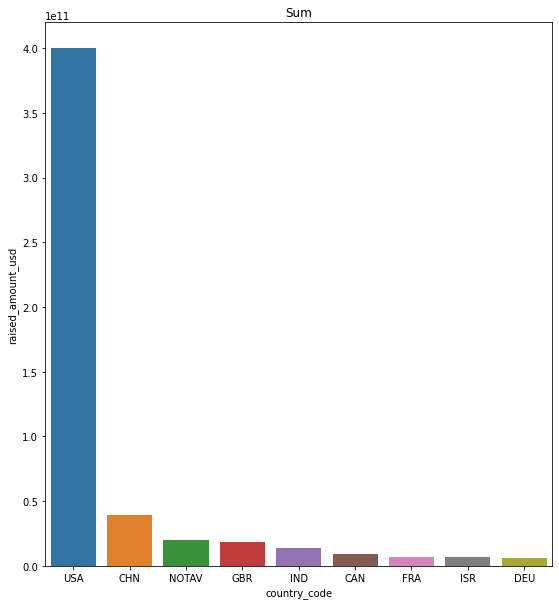

In [167]:
# Plotting sum across top 5 country_code 

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 2)
sns.barplot(x="country_code", y="raised_amount_usd", data=t9, estimator=sum)
plt.title("Sum")
plt.show()

#### Observations:
   1. Top English speaking country - **USA**
   2. Second English speaking country - **GBR**
   3. Third English speaking country - **IND**

<BR>

### Checkpoint 4: Sector Analysis 1

In [168]:
sector_mapping = pd.read_csv("datasets/mapping.csv", encoding = "ISO-8859-1")
sector_mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


In [169]:
sector_mapping.head(10)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,0,1


In [170]:
## replace 0 with na in category_list
sector_mapping.replace({'category_list': '0'},{'category_list': 'na'},regex=True,inplace=True)

## using melt method
sector_mapping = sector_mapping.melt(id_vars="category_list",var_name="main_sector")

## removing 0s and Blanks
sector_mapping = sector_mapping.loc[~(sector_mapping["value"]==0)]
sector_mapping = sector_mapping.loc[~(sector_mapping['main_sector']=='Blanks')]

#changing the case to upper and dropping value column
sector_mapping['category_list'] = sector_mapping['category_list'].str.upper()
sector_mapping.drop(columns="value")

,category_list,main_sector
8,ADVENTURE TRAVEL,Automotive & Sports
14,AEROSPACE,Automotive & Sports
45,AUTO,Automotive & Sports
46,AUTOMATED KIOSK,Automotive & Sports
47,AUTOMOTIVE,Automotive & Sports
...,...,...
6121,SOCIAL RECRUITING,"Social, Finance, Analytics, Advertising"
6122,SOCIAL TELEVISION,"Social, Finance, Analytics, Advertising"
6123,SOCIAL TRAVEL,"Social, Finance, Analytics, Advertising"
6134,STOCK EXCHANGES,"Social, Finance, Analytics, Advertising"


In [171]:
pd.set_option('mode.chained_assignment', None)
venture.loc[:,'primary_sector'] = venture['category_list'].str.split('|').str[0].copy()
venture.loc[:,'primary_sector'] = venture['primary_sector'].str.upper().copy()
venture.head(n=10)

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,/organization/-fame,#fame,Media,operating,IND,MEDIA
3,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.00,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NOTAV,APPS
4,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.00,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,CURATED WEB
8,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.00,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BIOTECHNOLOGY
10,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.00,/organization/0xdata,H2O.ai,Analytics,operating,USA,ANALYTICS
11,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.00,/organization/0xdata,H2O.ai,Analytics,operating,USA,ANALYTICS
12,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.00,/organization/0xdata,H2O.ai,Analytics,operating,USA,ANALYTICS
22,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.00,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,APPS
28,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,4000000.00,/organization/10-minutes-with,10 Minutes With,Education,operating,GBR,EDUCATION
34,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,16-02-2011,2520000.00,/organization/1000memories,1000memories,Curated Web,acquired,USA,CURATED WEB


In [172]:
venture_frame = pd.merge(venture,sector_mapping,how='inner',left_on='primary_sector',right_on='category_list')
venture_frame.drop(columns=["category_list_y","value"],inplace=True)
venture_frame.head(10)

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,primary_sector,main_sector
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,/organization/-fame,#fame,Media,operating,IND,MEDIA,Entertainment
1,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.00,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,MEDIA,Entertainment
2,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.00,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,MEDIA,Entertainment
3,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.00,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,MEDIA,Entertainment
4,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.00,/organization/all-def-digital,All Def Digital,Media,operating,USA,MEDIA,Entertainment
5,/funding-round/0959f59e3a89bc8db8c6ed9c646349fd,venture,02-05-2013,650000.00,/organization/audiosocket,Audiosocket,Media|Music|Technology,operating,USA,MEDIA,Entertainment
6,/funding-round/4e3a53eec6c609943df752206070b23f,venture,02-09-2009,750000.00,/organization/audiosocket,Audiosocket,Media|Music|Technology,operating,USA,MEDIA,Entertainment
7,/funding-round/bc0b412cf2fa7b739e4105ad756b47a4,venture,15-02-2012,1582300.00,/organization/audiosocket,Audiosocket,Media|Music|Technology,operating,USA,MEDIA,Entertainment
8,/funding-round/43cc678b39be3e684bb88501af05ff9b,venture,05-02-2009,2000000.00,/organization/babble,Babble,Media|News|Parenting,acquired,USA,MEDIA,Entertainment
9,/funding-round/5fdb3dbeeb6eea0243702adc372130f3,venture,12-05-2009,1250000.00,/organization/babble,Babble,Media|News|Parenting,acquired,USA,MEDIA,Entertainment


<br>

### Checkpoint 5: Sector Analysis 2

In [173]:
## Creating three separate data frames D1, D2 and D3 for each of the three countries (USA, GBR, IND) for venture FT

df1=venture_frame.loc[venture_frame['country_code']=='USA']
df2=venture_frame.loc[venture_frame['country_code']=='GBR']
df3=venture_frame.loc[venture_frame['country_code']=='IND']

In [174]:
df1.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,primary_sector,main_sector
4,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.00,/organization/all-def-digital,All Def Digital,Media,operating,USA,MEDIA,Entertainment
5,/funding-round/0959f59e3a89bc8db8c6ed9c646349fd,venture,02-05-2013,650000.00,/organization/audiosocket,Audiosocket,Media|Music|Technology,operating,USA,MEDIA,Entertainment
6,/funding-round/4e3a53eec6c609943df752206070b23f,venture,02-09-2009,750000.00,/organization/audiosocket,Audiosocket,Media|Music|Technology,operating,USA,MEDIA,Entertainment
7,/funding-round/bc0b412cf2fa7b739e4105ad756b47a4,venture,15-02-2012,1582300.00,/organization/audiosocket,Audiosocket,Media|Music|Technology,operating,USA,MEDIA,Entertainment
8,/funding-round/43cc678b39be3e684bb88501af05ff9b,venture,05-02-2009,2000000.00,/organization/babble,Babble,Media|News|Parenting,acquired,USA,MEDIA,Entertainment


In [175]:
## Total Investment Count for USD Country (TIC_USD)

TIC_USD=pd.DataFrame(df1.groupby(by='main_sector')['main_sector'].count().
                     rename('TIC').sort_values(ascending = False))
TIC_USD.head(3)

,TIC
main_sector,
Others,7773
Cleantech / Semiconductors,7515
"Social, Finance, Analytics, Advertising",6866


In [176]:
## TIC for GBR (TIC_GBR)

TIC_GBR=pd.DataFrame(df2.groupby(by='main_sector')['main_sector'].count().
                     rename('TIC').sort_values(ascending = False))
TIC_GBR.head(3)

,TIC
main_sector,
Others,483
Cleantech / Semiconductors,408
"Social, Finance, Analytics, Advertising",391


In [177]:
## TIC for IND (TIC_IND)

TIC_IND=pd.DataFrame(df3.groupby(by='main_sector')['main_sector'].count().
                     rename('TIC').sort_values(ascending = False))
TIC_IND.head(3)

,TIC
main_sector,
Others,273
"Social, Finance, Analytics, Advertising",141
"News, Search and Messaging",124


In [178]:
## Total Investment Amount for USD (TIA_USD)

TIA_USD=pd.DataFrame(df1.groupby(by='main_sector')['raised_amount_usd'].sum().
                     rename('TIA').sort_values(ascending = False))
TIA_USD.head(5)

,TIA
main_sector,
Cleantech / Semiconductors,113576810161.00
"Social, Finance, Analytics, Advertising",83628291678.00
Others,78576571399.00
"News, Search and Messaging",42699050974.00
Health,29678071924.00


In [179]:
## Total Investment Amount for GBR (TIA_GBR)

TIA_GBR=pd.DataFrame(df2.groupby(by='main_sector')['raised_amount_usd'].sum().
                     rename('TIA').sort_values(ascending = False))
TIA_GBR.head(5)

,TIA
main_sector,
Cleantech / Semiconductors,4824216133.00
Others,4368966959.00
"Social, Finance, Analytics, Advertising",3648593374.00
"News, Search and Messaging",1949145172.00
Health,1001799759.00


In [180]:
## Total Investment Amount for IND (TIA_IND)

TIA_IND=pd.DataFrame(df3.groupby(by='main_sector')['raised_amount_usd'].sum().
                     rename('TIA').sort_values(ascending = False))
TIA_IND.head(5)

,TIA
main_sector,
Others,6219892440.00
"News, Search and Messaging",1634879948.00
Automotive & Sports,1556350000.00
"Social, Finance, Analytics, Advertising",1521604920.00
Entertainment,965951777.00


In [181]:
## merging TIC and TIA into df1, df2 and df3

df1=pd.merge(pd.merge(df1,TIC_USD,how='inner',left_on='main_sector',right_index=True),
                    TIA_USD,how='inner',left_on='main_sector',right_index=True)
df2=pd.merge(pd.merge(df2,TIC_GBR,how='inner',left_on='main_sector',right_index=True),
                    TIA_GBR,how='inner',left_on='main_sector',right_index=True)
df3=pd.merge(pd.merge(df3,TIC_IND,how='inner',left_on='main_sector',right_index=True),
                    TIA_IND,how='inner',left_on='main_sector',right_index=True)

In [182]:
df1.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,primary_sector,main_sector,TIC,TIA
4,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.00,/organization/all-def-digital,All Def Digital,Media,operating,USA,MEDIA,Entertainment,1619,15923225157.00
5,/funding-round/0959f59e3a89bc8db8c6ed9c646349fd,venture,02-05-2013,650000.00,/organization/audiosocket,Audiosocket,Media|Music|Technology,operating,USA,MEDIA,Entertainment,1619,15923225157.00
6,/funding-round/4e3a53eec6c609943df752206070b23f,venture,02-09-2009,750000.00,/organization/audiosocket,Audiosocket,Media|Music|Technology,operating,USA,MEDIA,Entertainment,1619,15923225157.00
7,/funding-round/bc0b412cf2fa7b739e4105ad756b47a4,venture,15-02-2012,1582300.00,/organization/audiosocket,Audiosocket,Media|Music|Technology,operating,USA,MEDIA,Entertainment,1619,15923225157.00
8,/funding-round/43cc678b39be3e684bb88501af05ff9b,venture,05-02-2009,2000000.00,/organization/babble,Babble,Media|News|Parenting,acquired,USA,MEDIA,Entertainment,1619,15923225157.00


In [183]:
df1.loc[df1['main_sector']=='Others'].groupby(by='permalink')['raised_amount_usd'].count().sort_values(ascending = False)

permalink
/organization/terascala               13
/organization/vectormax               12
/organization/bti-systems             10
/organization/deliveryagent            9
/organization/appcelerator             9
                                      ..
/organization/network-vision           1
/organization/network-intelligence     1
/organization/network-for-good         1
/organization/netwolves                1
/organization/1010data                 1
Name: raised_amount_usd, Length: 4317, dtype: int64

In [184]:
df2.loc[df2['main_sector']=='Others'].groupby(by='permalink')['raised_amount_usd'].count().sort_values(ascending = False)

permalink
/organization/rostima            8
/organization/electric-cloud     7
/organization/helveta            6
/organization/picochip           6
/organization/myoptique-group    5
                                ..
/organization/metrasens          1
/organization/mesmo-tv           1
/organization/mediasurface       1
/organization/masterbranch       1
/organization/10-minutes-with    1
Name: raised_amount_usd, Length: 326, dtype: int64

In [185]:
df3.loc[df3['main_sector']=='Others'].groupby(by='permalink')['raised_amount_usd'].count().sort_values(ascending = False)

permalink
/organization/flipkart                        9
/organization/myntra                          8
/organization/tutorvista-com                  5
/organization/snapdeal                        5
/organization/canvera-digital-technologies    5
                                             ..
/organization/paladion                        1
/organization/opinio-2                        1
/organization/nobroker                        1
/organization/nobel-hygiene                   1
/organization/21diamonds-india                1
Name: raised_amount_usd, Length: 176, dtype: int64

In [186]:
df1.loc[df1['main_sector']=='Cleantech / Semiconductors'].groupby(by='permalink')['raised_amount_usd'].count().sort_values(ascending = False)

permalink
/organization/covenant-surgical-partners    12
/organization/pro-pharmaceuticals           12
/organization/tigo-energy                   12
/organization/cns-response                  11
/organization/airxpanders                   10
                                            ..
/organization/medical-device-innovations     1
/organization/medical-connections            1
/organization/mederi-therapeutics            1
/organization/medarchon                      1
/organization/10x-genomics                   1
Name: raised_amount_usd, Length: 3582, dtype: int64

In [187]:
df2.loc[df2['main_sector']=='Cleantech / Semiconductors'].groupby(by='permalink')['raised_amount_usd'].count().sort_values(ascending = False)

permalink
/organization/green-biologics                                                  6
/organization/f-star-biotechnologische-forschungs-und-entwicklungsges-m-b-h    5
/organization/horizon-discovery                                                5
/organization/oxford-biotherapeutics                                           5
/organization/sirigen                                                          5
                                                                              ..
/organization/microscience                                                     1
/organization/marine-current-turbines                                          1
/organization/lumora                                                           1
/organization/lumicity                                                         1
/organization/3sun                                                             1
Name: raised_amount_usd, Length: 260, dtype: int64

In [188]:
df2.loc[df2['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(by='permalink')['raised_amount_usd'].count().sort_values(ascending = False)

permalink
/organization/similarweb               6
/organization/worldremit               6
/organization/celltick-technologies    5
/organization/sportpursuit             5
/organization/borro                    5
                                      ..
/organization/mozoo                    1
/organization/more2                    1
/organization/moo                      1
/organization/money-mover              1
/organization/loopme                   1
Name: raised_amount_usd, Length: 254, dtype: int64

In [189]:
df1.shape

(33609, 13)

In [190]:
df2.shape

(1895, 13)

In [191]:
df3.shape

(792, 13)

In [192]:
TIA_USD.TIA.sum()

398090554088.0

In [193]:
TIA_GBR.TIA.sum()

18142285645.0

In [194]:
TIA_IND.TIA.sum()

13920253718.0

<br>

### Checkpoint 6: Plots

In [195]:
plot1=master_frame.loc[(master_frame['funding_round_type'] == 'angel') | 
                             (master_frame['funding_round_type'] == 'venture') | 
                             (master_frame['funding_round_type'] == 'seed') | 
                             (master_frame['funding_round_type'] == 'private_equity'), :].groupby('funding_round_type')['raised_amount_usd'].sum()
plot1.head(n=10)

funding_round_type
angel              4218535622.00
private_equity   136489908405.00
seed              16063598753.00
venture          554822839010.00
Name: raised_amount_usd, dtype: float64

#### A plot showing the representative amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.  

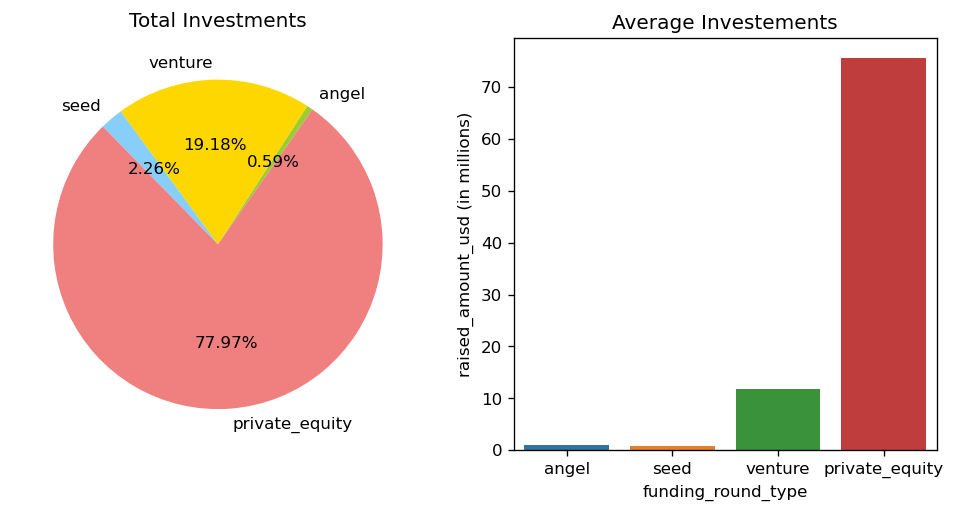

In [196]:
plt.figure(figsize=[10.0,10.0],dpi=120,edgecolor='c',frameon=True)
plt.subplot(221)
plt.title('Total Investments',pad=7)
labels = ['angel', 'venture', 'seed', 'private_equity']
colors = ['yellowgreen', 'gold','lightskyblue', 'lightcoral']
# Plot
plt.pie(plot1, labels=labels, colors=colors,autopct='%1.2f%%', startangle=55)

# subplot 2 - Average Amount of Investment
plt.subplot(222)
sns.barplot(x=master_frame['funding_round_type'],y=master_frame['raised_amount_usd']/1000000,estimator=np.mean,order=["angel","seed","venture","private_equity"],ci=None)
plt.ylabel("raised_amount_usd (in millions)")
plt.title("Average Investements") 
plt.show()

#### A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

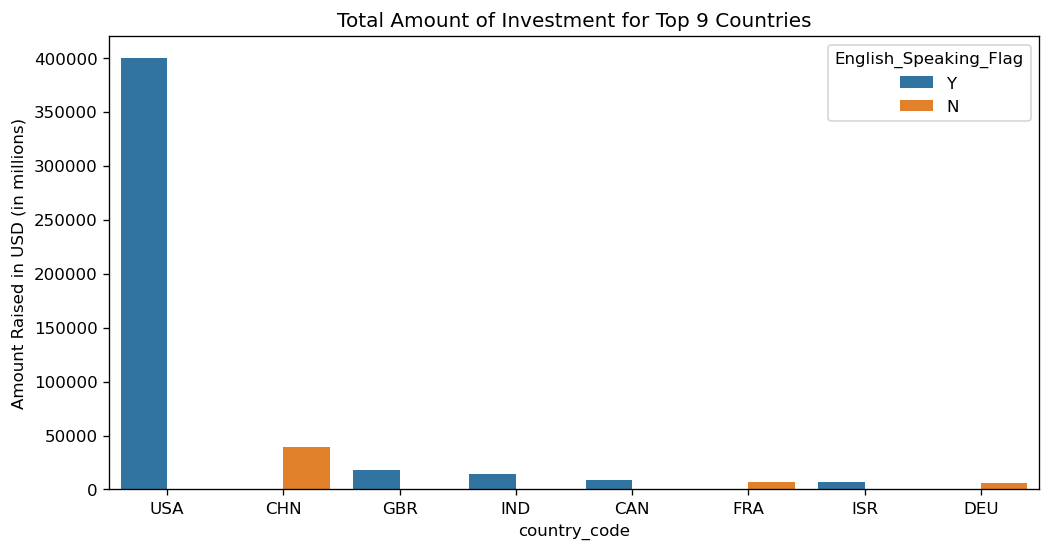

In [197]:
engCountries=pd.DataFrame({'country_code': ['USA','CHN','GBR','IND','CAN','FRA','ISR','DEU','JPN'],
                        'English_Speaking_Flag': ['Y','N','Y','Y','Y','N','Y','N','N']})
engCountries.head(n=10)

## merging with t9 dataframe

t9 = pd.merge(t9, engCountries, how='inner', on='country_code')
t9

## plotting

plt.figure(figsize=[10.0,5.0],dpi=120,frameon=True)
sns.barplot(x=t9['country_code'],y=t9['raised_amount_usd']/1000000,hue=t9['English_Speaking_Flag'],ci=None)
plt.ylabel("Amount Raised in USD (in millions)")
plt.title("Total Amount of Investment for Top 9 Countries") 
plt.show()

In [198]:
TIC_USD.reset_index(inplace=True)
TIC_GBR.reset_index(inplace=True)
TIC_IND.reset_index(inplace=True)

TIC_USD = TIC_USD.sort_values(by='TIC',ascending = False).head(n=3)
TIC_USD['Country'] = 'USA'
TIC_GBR = TIC_GBR.sort_values(by='TIC',ascending = False).head(n=3)
TIC_GBR['Country'] = 'GBR'
TIC_IND = TIC_IND.sort_values(by='TIC',ascending = False).head(n=3)
TIC_IND['Country'] = 'IND'

In [199]:
TIC=pd.merge(pd.merge(TIC_USD,TIC_GBR,how='outer'),TIC_IND,how='outer')
TIC.head(n=10)

,main_sector,TIC,Country
0,Others,7773,USA
1,Cleantech / Semiconductors,7515,USA
2,"Social, Finance, Analytics, Advertising",6866,USA
3,Others,483,GBR
4,Cleantech / Semiconductors,408,GBR
5,"Social, Finance, Analytics, Advertising",391,GBR
6,Others,273,IND
7,"Social, Finance, Analytics, Advertising",141,IND
8,"News, Search and Messaging",124,IND


#### A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.

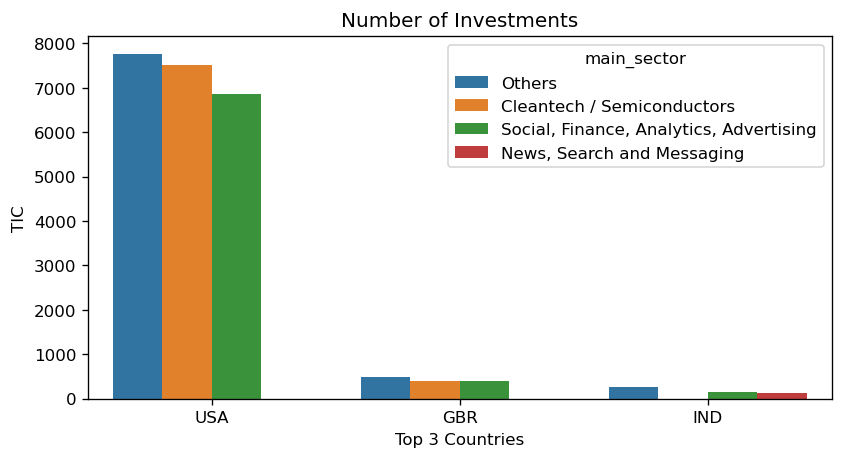

In [200]:
plt.figure(figsize=[8.0,4.0],dpi=120,frameon=True)
sns.barplot(x='Country', y='TIC', hue='main_sector',data=TIC)
plt.ylabel("TIC")
plt.xlabel("Top 3 Countries")
plt.title("Number of Investments") 
plt.show()